📊 ランク頻度分布を保存しました: proposer_rank_distribution.png
⏱️ ヒストグラム保存: block_interval_distribution.png

📈 Block Generation Interval Statistics:
  Count     : 499
  Mean      : 9.915 sec
  Median    : 10.086 sec
  Std Dev   : 1.387 sec
  Variance  : 1.924 sec²
🟢 散布図を保存しました: interval_vs_rank_scatter.png


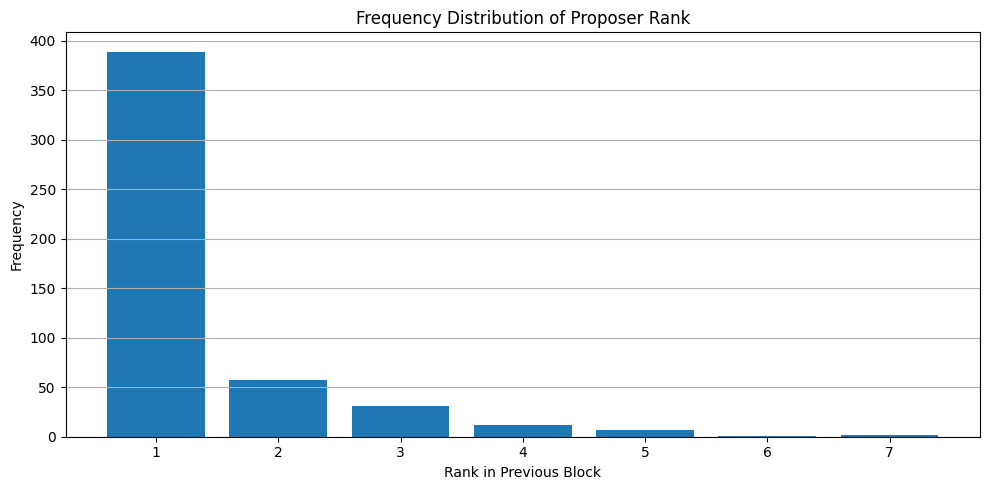

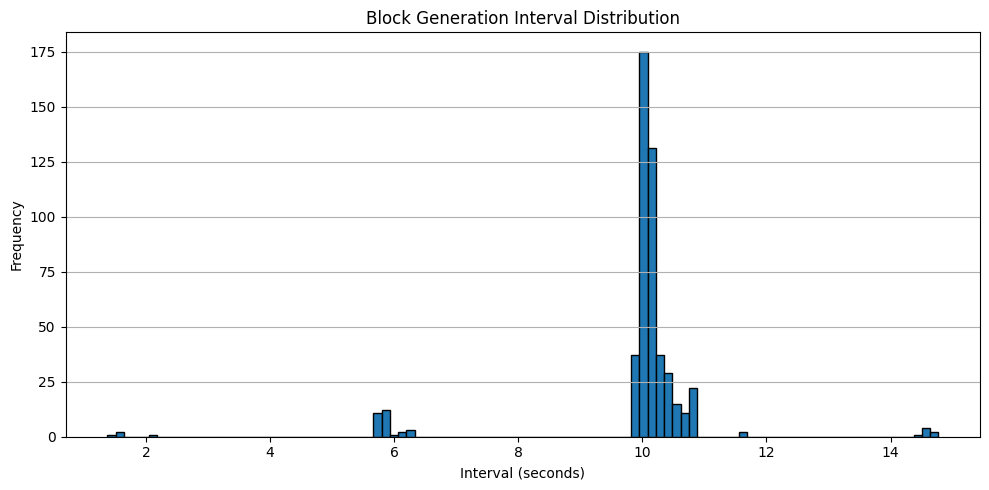

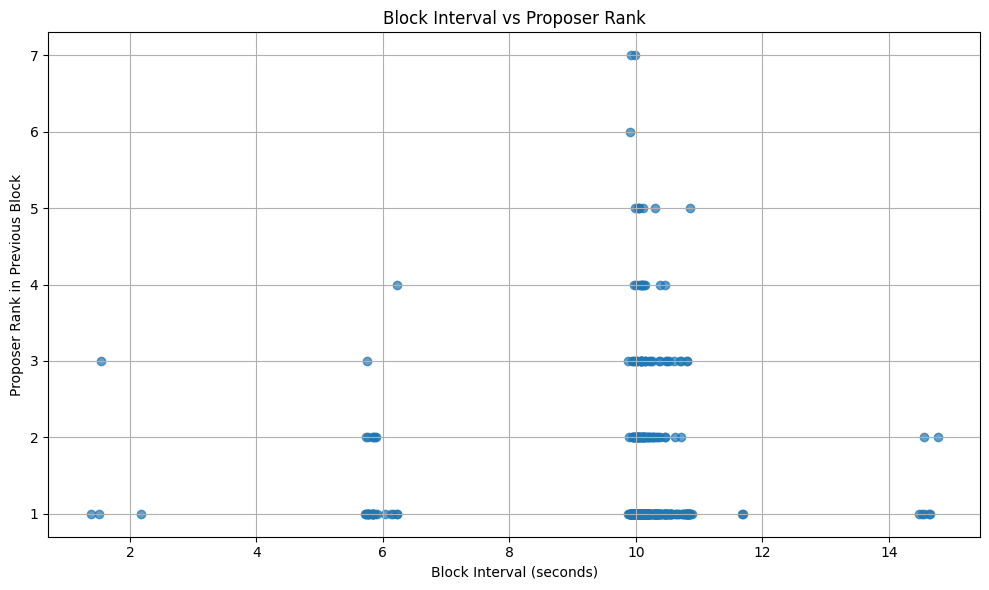

In [1]:
import pandas as pd
import matplotlib.pyplot as *___*
from collections import Counter
from datetime import datetime

# --- 設定 ---
csv_file = "block_analysis.csv"
output_file_rank = "proposer_rank_distribution.png"
output_file_interval = "block_interval_distribution.png"
output_file_scatter = "interval_vs_rank_scatter.png"

# --- データ読み込み ---
df = pd.read_csv(*___*)

# --- proposer_rank_in_prev の頻度分布 ---
rank_counts = Counter(df["proposer_rank_in_prev"].dropna().astype(int))
ranks, counts = zip(*sorted(rank_counts.items()))

plt.figure(figsize=(10, 5))
plt.bar(ranks, counts)
plt.title("Frequency Distribution of Proposer Rank")
plt.xlabel("Rank in Previous Block")
plt.ylabel("Frequency")
plt.xticks(ranks)
plt.grid(axis="y")
plt.tight_layout()
plt.savefig(output_file_rank)
print(f"📊 ランク頻度分布を保存しました: {output_file_rank}")

# --- ブロック生成時間間隔（秒） ---
df["timestamp"] = pd.to_datetime(df["timestamp"], utc=True)
df["block_interval_sec"] = df["timestamp"].diff().dt.total_seconds()
intervals = df["block_interval_sec"].dropna()

# ヒストグラム描画（100 bins）
plt.figure(figsize=(10, 5))
plt.hist(intervals, bins=100)
plt.title("Block Generation Interval Distribution")
plt.xlabel("Interval (seconds)")
plt.ylabel("Frequency")
plt.grid(axis="y")
plt.tight_layout()
plt.savefig("_____.png") 
print(f"⏱️ ヒストグラム保存: {output_file_interval}")

# --- 統計出力 ---
mean_interval = intervals.mean()
median_interval = intervals.median()
std_interval = intervals.std()
var_interval = intervals.var()
count = len(intervals)

print("\n📈 Block Generation Interval Statistics:")
print(f"  Count     : {count}")
print(f"  Mean      : {mean_interval:.3f} sec")
print(f"  Median    : {median_interval:.3f} sec")
print(f"  Std Dev   : {std_interval:.3f} sec")
print(f"  Variance  : {var_interval:.3f} sec²")

# --- 散布図：生成間隔 vs proposer_rank_in_prev ---
scatter_data = df[["block_interval_sec", "proposer_rank_in_prev"]].dropna()

plt.figure(figsize=(10, 6))
plt.scatter(scatter_data["block_interval_sec"],*___*["proposer_rank_in_prev"], alpha=0.7)
plt.title("Block Interval vs Proposer Rank")
plt.xlabel("Block Interval (seconds)")
plt.ylabel("Proposer Rank in Previous Block")
plt.grid(True)
plt.tight_layout()
plt.savefig(output_file_scatter)
print(f"🟢 散布図を保存しました: {output_file_scatter}")
